In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

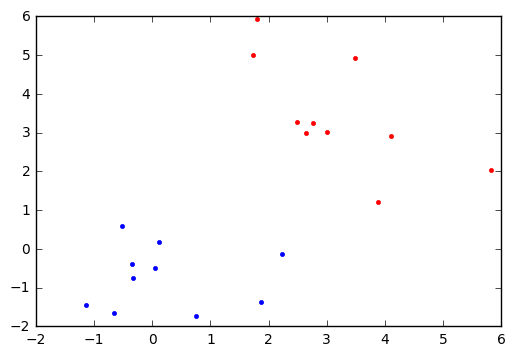

In [5]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [3, 3]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

1) What is an equation of line/plane? 

In [6]:
# w *x + b = 0

2) Explain geometrical interpretation of the two parameters

In [7]:
# w-> normal vector / slope-ish
#b -> offset 

3) How do you determine whether a point $\vec{x}$ is one side of the line or another?

In [ ]:
# w*x + b > 0 will be right side <0 will be left 

4) Given a line, is $\vec{w}$ and $b$ unique. (Are there two equation that represents the same line?)

In [ ]:
# no because we can divide by wtv we want

5) Give another equation for the line represent by $\vec{w}=[1,2]$, $b=3$.

In [ ]:
# [2,4] , 6

6) If we want $b$ in the previous equation to be 1. What should $\vec{w}$ be

In [ ]:
# W = [1/3, 2/3]

7) Draw a line defined by $\vec{w}=[2,3]$, $b=1$.

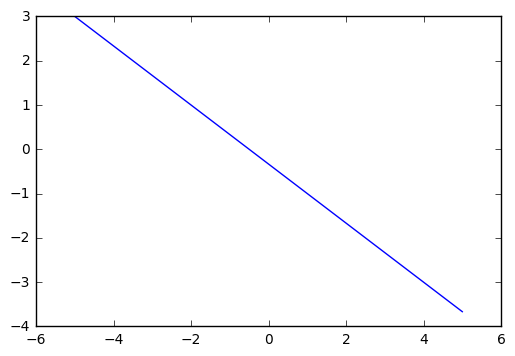

In [19]:
def equation(x, w=[2,3], b = 1):
    return np.dot(w, x) + b

xs = np.linspace(-5,5,100)
ys = [equation(x) for x in xs]

#plt.plot(xs,ys)

#######

#transform into y = mx +c
# find m and c then plot
# w1 x + w2 y + b = 0
# y = -b/w2 - w1/w2 x
# m = -w1/w2
# c = -b/w2


# c = -1/3
# m = -2/3
# y = m*xs +c

# plt.plot(xs,y)


def plt_line(w, b):
    # w1 x + w2 y + b = 0
    # y = -b/w2 - w1/w2 x
    # m = -w1/w2
    # c = -b/w2
    m = -w[0]/float(w[1])
    c = -b/float(w[1])
    x = np.linspace(-5,5,100)
    y = m*x + c
    plt.plot(x,y)

plt_line([2,3], 1)

8) Draw a green point on the side where $\vec{w}\cdot\ x + b > 0$ and a blue point on the other side.

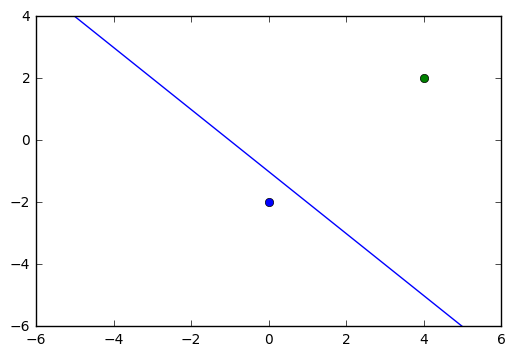

In [20]:
plt.plot(xs,y)

plt.plot(4,2, "og")
plt.plot(0,-2,"ob")

9) What is a linearly separable data?

In [21]:
# data that we can draw a straight line seperating the 2 with 100% accuracy

10) What is a margin?

In [22]:
# distance from the line to the boundary points

11) How do we calculate the margin? And with that formula what kind of normalization are we using?

In [23]:
# 2 / |w|

12) What are we trying to optimize? What are our contraint?

In [24]:
# minimize 1/2 * |w| **2
# subject to y_i * (w x_i + b) >=1

13) Can we use gradient descent with constrained optimization? Why?

In [ ]:
# no because gradient descent doesnt work with constraints

14) Given these data points find the line of maximum margin. Draw it along with data points.

Use numpy.optimize.minimize with method = SLSQP

Read the doc here.
http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [27]:
def f(x):
    a ,b = x
    return (a - 1) **2 + (b - 2) **2

from scipy.optimize import minimize

#minimize f(x)
# subject to: x -----> (a,b)
# a-5 >= 0
# b-5 >=0

# return list of things that should be greater than 0

def constraints(x):
    a,b = x
    return [a-5,b-4]

cons = ({'type' : 'ineq',
         'fun' : constraints})

minimize(f, [10., 10.], method = "SLSQP", constraints = cons)

     fun: 19.999999999988923
     jac: array([ 8.,  4.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 5.,  4.])

In [42]:
def f(v):
    b = v[0]
    w = v[1:]
    return np.sum(w**2) *0.5

#minimize f(x)
# subject to: x -----> (a,b)
# y _i * (w*x_i * b) -1 >= 0

# return list of things that should be greater than 0

def constraints(v):
    b = v[0]
    w = v[1:]
    return [y * (np.dot(w, x) + b) - 1 for x,y in zip(data, classes)]

cons = ({'type' : 'ineq',
         'fun' : constraints})

res= minimize(f, [1. , 2. ,3.], method = "SLSQP", constraints = cons)
print res

     fun: 0.44172605696636191
     jac: array([ 0.        , -0.73160328, -0.59009214,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 2.55905479, -0.73160328, -0.59009215])


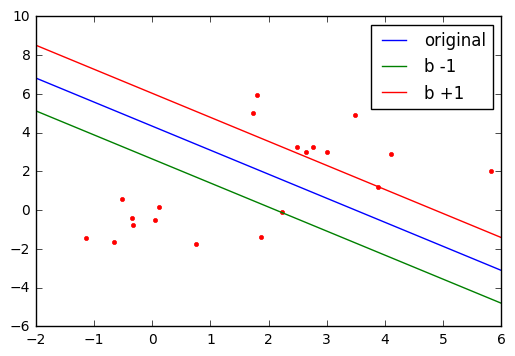

In [47]:
b = res.x[0]
w = res.x[1:]
m = -w[0]/w[1]
c = -b/w[1]
 
# data    
xs = np.linspace(-2, 6, 100)
ys = m*xs + c
plt.plot(data[:, 0], data[:, 1], '.r')
plt.plot(xs, ys, label = "original")
 
m = -w[0]/w[1]
cl = -(b-1)/w[1]
xs = np.linspace(-2, 6, 100)
yls = m*xs + cl
plt.plot(xs,yls, label = "b -1")
 
m = -w[0]/w[1]
cr = -(b+1)/w[1]
xs = np.linspace(-2, 6, 100)
yrs = m*xs + cr
plt.plot(xs,yrs, label = "b +1")

plt.legend()

15) What is a slack variable?

In [ ]:
# how far on the wrong side a data point is from the margin

16) How do we penalize the slack variable.

In [ ]:
# max(0, slack variable) # soft margin

17) Plot soft margin cost function along with logistic cost.

18) How can we view our new and penalized cost function as a regularization?

In [48]:
# cost = 1/2 w ^2 + c * sum max(0, xi)

# 1/2 w^2 ----> complexity
# max(0, xi) --> accuracy 

19) Try your new cost function with these data points.

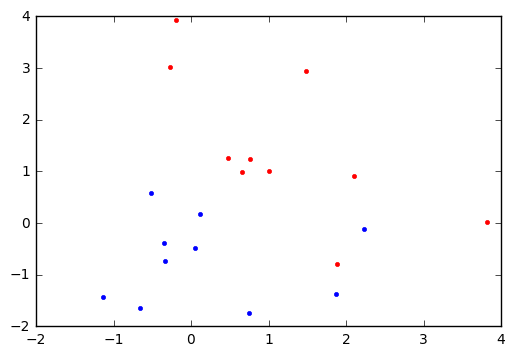

In [54]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [1, 1]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

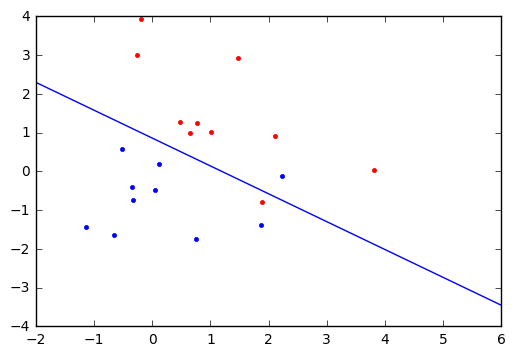

In [69]:
C = 100
def cost(x):
    b = x[0]
    w = x[1:]
    return (0.5*np.sum(w**2) ) + (C * sum([max(0, 1 - y * (np.dot(x, w) + b)) for x,y in zip(data, classes)]))

res= minimize(cost, [1. , 2. ,3.])
b = res.x[0]
w = res.x[1:]
m = -w[0]/w[1]
c = -b/w[1]
 
# data    
xs = np.linspace(-2, 6, 100)
ys = m*xs + c
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
plt.plot(xs, ys, label = "original")

20) What if we want a curved line? Draw contour plot.

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1]


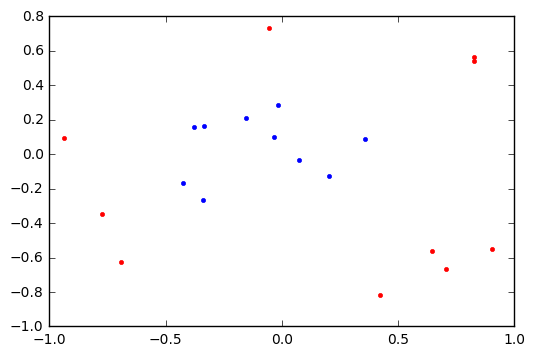

In [72]:
np.random.seed(9999)
data = np.random.random((20,2))*2-1
def is_pos(x):
    return 1 if np.linalg.norm(x-[0.1,0.1])<0.6 else -1
classes = np.array([is_pos(x) for x in data])
print classes
plt.plot(data[classes==1,0], data[classes==1,1], '.b')
plt.plot(data[classes==-1,0], data[classes==-1,1], '.r')

5203.18337096


<a list of 10 text.Text objects>

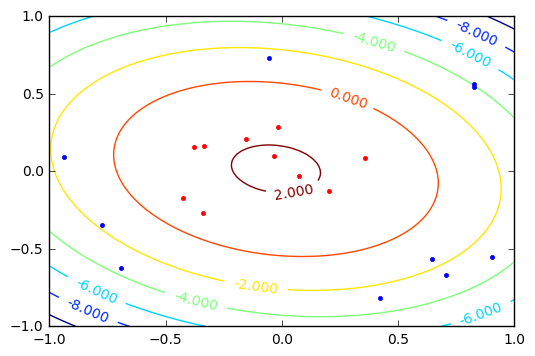

In [73]:
def transform(x):
    x1, x2 = x
    return [x1, x2, x1*x2, x1**2, x2**2]
tdata = np.array([transform(x) for x in data])
 
C = 100
def cost(ws):
    b = ws[0]
    w = ws[1:]
    xi = [max(0,1-y*(np.dot(x, w) + b)) for y,x in zip(classes, tdata)]
    sum_xi = sum(xi)
    return 0.5*np.linalg.norm(w)**2 + C*sum_xi
 
print cost([0,1,2,3,4,5])
res = minimize(cost, [0,1,2,3,4,5] )
b = res.x[0]
w = res.x[1:]
 
xs = np.linspace(-1,1, 100)
ys = np.linspace(-1,1, 100)
zs = np.empty((100,100))
for ix, x in enumerate(xs):
    for iy, y in enumerate(ys):
        tx = transform([x,y])
        zs[iy, ix] = np.dot(w,tx) + b
        
plt.plot(data[classes==1, 0], data[classes==1, 1], '.r')
plt.plot(data[classes==-1, 0], data[classes==-1, 1], '.b')
 
CS = plt.contour(xs, ys, zs)
plt.clabel(CS)

21) What are the support vectors?